In [6]:
import pandas as pd
import glob
import os

from IPython.display import HTML, display
from cellphonedb.utils import db_releases_utils

display(HTML(db_releases_utils.get_remote_database_versions_html()['db_releases_html_table']))

# -- Version of the databse
cpdb_version = 'v5.0.0'

# -- Path where the input files to generate the database are located
cpdb_target_dir = os.path.join('/mnt/workingB/ASD_PBMC/final_Rdata/', cpdb_version)

from cellphonedb.utils import db_utils

db_utils.download_database(cpdb_target_dir, cpdb_version)

Downloaded cellphonedb.zip into /mnt/workingB/ASD_PBMC/final_Rdata/v5.0.0
Downloaded complex_input.csv into /mnt/workingB/ASD_PBMC/final_Rdata/v5.0.0
Downloaded gene_input.csv into /mnt/workingB/ASD_PBMC/final_Rdata/v5.0.0
Downloaded interaction_input.csv into /mnt/workingB/ASD_PBMC/final_Rdata/v5.0.0
Downloaded protein_input.csv into /mnt/workingB/ASD_PBMC/final_Rdata/v5.0.0
Downloaded uniprot_synonyms.tsv into /mnt/workingB/ASD_PBMC/final_Rdata/v5.0.0/sources
Downloaded transcription_factor_input.csv into /mnt/workingB/ASD_PBMC/final_Rdata/v5.0.0/sources


In [8]:
# -- Path where the input files to generate the database are located
cpdb_input_dir = '/mnt/workingB/ASD_PBMC/final_Rdata/v5.0.0/' 
os.listdir(cpdb_input_dir)

from cellphonedb.utils import db_utils

# -- Creates new database
db_utils.create_db(cpdb_input_dir)


Created /mnt/workingB/ASD_PBMC/final_Rdata/v5.0.0/cellphonedb_12_29_2025_144007.zip successfully


In [10]:
import anndata

adata_BO = anndata.read_h5ad('/mnt/workingB/ASD_PBMC/final_Rdata/ASD_PBMC_final_supp_PBMC_BO_2025-12-29 14-16-18.h5ad')
adata_AO = anndata.read_h5ad('/mnt/workingB/ASD_PBMC/final_Rdata/ASD_PBMC_final_supp_PBMC_AO_2025-12-29 14-16-18.h5ad')

In [12]:
# 컬럼 목록 전체 출력
print(adata_BO.obs.columns)

# 또는 데이터 앞부분 5줄을 출력해서 눈으로 확인
print(adata_BO.obs.head())

Index(['orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'nCount_SCT',
       'nFeature_SCT', 'SCT_snn_res.1', 'seurat_clusters', 'cell.type.fine',
       'cell.type.coarse', 'Donor', 'percent.rb', 'percent.mrp', 'percent.hb',
       'log10GenesPerUMI', 'donor', 'full', 'S.Score', 'G2M.Score', 'Phase',
       'old.ident', 'SCT_snn_res.1.1', 'SCT_snn_res.1.2', 'SCT_snn_res.1.3',
       'SCT_snn_res.1.4', 'SCT_snn_res.1.5', 'SCT_snn_res.1.6',
       'SCT_snn_res.1.7', 'SCT_snn_res.1.8', 'SCT_snn_res.1.9',
       'SCT_snn_res.2', 'SCT_snn_res.0.1', 'SCT_snn_res.0.2',
       'SCT_snn_res.0.3', 'SCT_snn_res.0.4', 'SCT_snn_res.0.5',
       'SCT_snn_res.0.6', 'SCT_snn_res.0.7', 'SCT_snn_res.0.8',
       'SCT_snn_res.0.9'],
      dtype='object')
                                  orig.ident  nCount_RNA  nFeature_RNA  \
7202806_before_a_bcFOSI_12  7202806_before_a      8655.0          3633   
7202806_before_a_bcGSGB_12  7202806_before_a      5990.0          2342   
7202806_before_a_bcEIX

In [21]:
meta_file_path_BO = '/mnt/workingB/ASD_PBMC/final_Rdata/v5.0.0/ASD_PBMC_final_supp_PBMC_BO_meta.tsv'
counts_file_path_BO = '/mnt/workingB/ASD_PBMC/final_Rdata/v5.0.0/ASD_PBMC_final_supp_PBMC_BO_count.txt'

meta_file_path_AO = '/mnt/workingB/ASD_PBMC/final_Rdata/v5.0.0/ASD_PBMC_final_supp_PBMC_AO_meta.tsv'
counts_file_path_AO = '/mnt/workingB/ASD_PBMC/final_Rdata/v5.0.0/ASD_PBMC_final_supp_PBMC_AO_count.txt'

cpdb_file_path = '/mnt/workingB/ASD_PBMC/final_Rdata/v5.0.0/cellphonedb.zip'
out_path = '/mnt/workingB/ASD_PBMC/final_Rdata/v5.0.0/cellphone_results/'

In [22]:

from cellphonedb.src.core.methods import cpdb_statistical_analysis_method

cpdb_results_BO = cpdb_statistical_analysis_method.call(
         cpdb_file_path = cpdb_file_path,
         meta_file_path = meta_file_path_BO,
         counts_file_path = counts_file_path_BO,
         counts_data = 'hgnc_symbol',
         score_interactions = True,                       # optional: whether to score interactions or not. 
    iterations = 1000,                               # denotes the number of shufflings performed in the analysis.
    threshold = 0.1,                                 # defines the min % of cells expressing a gene for this to be employed in the analysis.
    threads = 16,                                     # number of threads to use in the analysis.
    debug_seed = 42,                                 # debug randome seed. To disable >=0.
    result_precision = 3,                            # Sets the rounding for the mean values in significan_means.
    pvalue = 0.05,                                   # P-value threshold to employ for significance.
    subsampling = False,                             # To enable subsampling the data (geometri sketching).
    subsampling_log = False,                         # (mandatory) enable subsampling log1p for non log-transformed data inputs.
    subsampling_num_pc = 100,                        # Number of componets to subsample via geometric skectching (dafault: 100).
    subsampling_num_cells = 1000,                    # Number of cells to subsample (integer) (default: 1/3 of the dataset).
    separator = '|',                                 # Sets the string to employ to separate cells in the results dataframes "cellA|CellB".
    debug = False,                                   # Saves all intermediate tables employed during the analysis in pkl format.
    output_path = out_path,                          # Path to save results.
    output_suffix = None                             # Replaces the timestamp in the output files by a user defined string in the  (default: None).
    )

Reading user files...
The following user files were loaded successfully:
/mnt/workingB/ASD_PBMC/final_Rdata/v5.0.0/ASD_PBMC_final_supp_PBMC_BO_count.txt
/mnt/workingB/ASD_PBMC/final_Rdata/v5.0.0/ASD_PBMC_final_supp_PBMC_BO_meta.tsv
[ ][CORE][29/12/25-15:12:51][INFO] [Cluster Statistical Analysis] Threshold:0.1 Iterations:1000 Debug-seed:42 Threads:16 Precision:3
[ ][CORE][29/12/25-15:12:51][WARNING] Debug random seed enabled. Set to 42
[ ][CORE][29/12/25-15:12:53][INFO] Running Real Analysis
[ ][CORE][29/12/25-15:12:53][INFO] Running Statistical Analysis


100%|██████████| 1000/1000 [00:31<00:00, 31.52it/s]

[ ][CORE][29/12/25-15:13:25][INFO] Building Pvalues result


[ ][CORE][29/12/25-15:13:25][INFO] Building results
[ ][CORE][29/12/25-15:13:25][INFO] Scoring interactions: Filtering genes per cell type..


100%|██████████| 11/11 [00:00<00:00, 129.40it/s]

[ ][CORE][29/12/25-15:13:25][INFO] Scoring interactions: Calculating mean expression of each gene per group/cell type..



100%|██████████| 11/11 [00:00<00:00, 399.25it/s]


[ ][CORE][29/12/25-15:13:26][INFO] Scoring interactions: Calculating scores for all interactions and cell types..


100%|██████████| 121/121 [00:05<00:00, 20.31it/s]


Saved deconvoluted to /mnt/workingB/ASD_PBMC/final_Rdata/v5.0.0/cellphone_results/statistical_analysis_deconvoluted_12_29_2025_151333.txt
Saved deconvoluted_percents to /mnt/workingB/ASD_PBMC/final_Rdata/v5.0.0/cellphone_results/statistical_analysis_deconvoluted_percents_12_29_2025_151333.txt
Saved means to /mnt/workingB/ASD_PBMC/final_Rdata/v5.0.0/cellphone_results/statistical_analysis_means_12_29_2025_151333.txt
Saved pvalues to /mnt/workingB/ASD_PBMC/final_Rdata/v5.0.0/cellphone_results/statistical_analysis_pvalues_12_29_2025_151333.txt
Saved significant_means to /mnt/workingB/ASD_PBMC/final_Rdata/v5.0.0/cellphone_results/statistical_analysis_significant_means_12_29_2025_151333.txt
Saved interaction_scores to /mnt/workingB/ASD_PBMC/final_Rdata/v5.0.0/cellphone_results/statistical_analysis_interaction_scores_12_29_2025_151333.txt


In [23]:

from cellphonedb.src.core.methods import cpdb_statistical_analysis_method

cpdb_results_AO = cpdb_statistical_analysis_method.call(
         cpdb_file_path = cpdb_file_path,
         meta_file_path = meta_file_path_AO,
         counts_file_path = counts_file_path_AO,
         counts_data = 'hgnc_symbol',
         score_interactions = True,                       # optional: whether to score interactions or not. 
    iterations = 1000,                               # denotes the number of shufflings performed in the analysis.
    threshold = 0.1,                                 # defines the min % of cells expressing a gene for this to be employed in the analysis.
    threads = 16,                                     # number of threads to use in the analysis.
    debug_seed = 42,                                 # debug randome seed. To disable >=0.
    result_precision = 3,                            # Sets the rounding for the mean values in significan_means.
    pvalue = 0.05,                                   # P-value threshold to employ for significance.
    subsampling = False,                             # To enable subsampling the data (geometri sketching).
    subsampling_log = False,                         # (mandatory) enable subsampling log1p for non log-transformed data inputs.
    subsampling_num_pc = 100,                        # Number of componets to subsample via geometric skectching (dafault: 100).
    subsampling_num_cells = 1000,                    # Number of cells to subsample (integer) (default: 1/3 of the dataset).
    separator = '|',                                 # Sets the string to employ to separate cells in the results dataframes "cellA|CellB".
    debug = False,                                   # Saves all intermediate tables employed during the analysis in pkl format.
    output_path = out_path,                          # Path to save results.
    output_suffix = None                             # Replaces the timestamp in the output files by a user defined string in the  (default: None).
    )

Reading user files...
The following user files were loaded successfully:
/mnt/workingB/ASD_PBMC/final_Rdata/v5.0.0/ASD_PBMC_final_supp_PBMC_AO_count.txt
/mnt/workingB/ASD_PBMC/final_Rdata/v5.0.0/ASD_PBMC_final_supp_PBMC_AO_meta.tsv
[ ][CORE][29/12/25-15:14:06][INFO] [Cluster Statistical Analysis] Threshold:0.1 Iterations:1000 Debug-seed:42 Threads:16 Precision:3
[ ][CORE][29/12/25-15:14:06][WARNING] Debug random seed enabled. Set to 42
[ ][CORE][29/12/25-15:14:06][INFO] Running Real Analysis
[ ][CORE][29/12/25-15:14:06][INFO] Running Statistical Analysis


100%|██████████| 1000/1000 [00:42<00:00, 23.27it/s]

[ ][CORE][29/12/25-15:14:50][INFO] Building Pvalues result


[ ][CORE][29/12/25-15:14:50][INFO] Building results
[ ][CORE][29/12/25-15:14:50][INFO] Scoring interactions: Filtering genes per cell type..


100%|██████████| 11/11 [00:00<00:00, 85.71it/s]

[ ][CORE][29/12/25-15:14:51][INFO] Scoring interactions: Calculating mean expression of each gene per group/cell type..



100%|██████████| 11/11 [00:00<00:00, 271.14it/s]


[ ][CORE][29/12/25-15:14:51][INFO] Scoring interactions: Calculating scores for all interactions and cell types..


100%|██████████| 121/121 [00:06<00:00, 19.59it/s]


Saved deconvoluted to /mnt/workingB/ASD_PBMC/final_Rdata/v5.0.0/cellphone_results/statistical_analysis_deconvoluted_12_29_2025_151458.txt
Saved deconvoluted_percents to /mnt/workingB/ASD_PBMC/final_Rdata/v5.0.0/cellphone_results/statistical_analysis_deconvoluted_percents_12_29_2025_151458.txt
Saved means to /mnt/workingB/ASD_PBMC/final_Rdata/v5.0.0/cellphone_results/statistical_analysis_means_12_29_2025_151458.txt
Saved pvalues to /mnt/workingB/ASD_PBMC/final_Rdata/v5.0.0/cellphone_results/statistical_analysis_pvalues_12_29_2025_151458.txt
Saved significant_means to /mnt/workingB/ASD_PBMC/final_Rdata/v5.0.0/cellphone_results/statistical_analysis_significant_means_12_29_2025_151458.txt
Saved interaction_scores to /mnt/workingB/ASD_PBMC/final_Rdata/v5.0.0/cellphone_results/statistical_analysis_interaction_scores_12_29_2025_151458.txt


In [24]:
# Get the column names of the 'interaction_scores' DataFrame
column_names_BO = cpdb_results_BO['interaction_scores'].columns
column_names_AO = cpdb_results_AO['interaction_scores'].columns

print(column_names_BO)

Index(['id_cp_interaction', 'interacting_pair', 'partner_a', 'partner_b',
       'gene_a', 'gene_b', 'secreted', 'receptor_a', 'receptor_b',
       'annotation_strategy',
       ...
       'pDC|CD4+ T', 'pDC|CD8+ T', 'pDC|Granulocyte', 'pDC|Monocyte', 'pDC|NK',
       'pDC|PB', 'pDC|Platelet', 'pDC|RBC', 'pDC|gdT', 'pDC|pDC'],
      dtype='object', length=134)


In [25]:
# Get the 'interaction_scores' DataFrame
interaction_scores_df_BO = cpdb_results_BO['interaction_scores']
interaction_scores_df_AO = cpdb_results_AO['interaction_scores']

# Identify columns that contain "CD4 T|"
columns_to_include = [col for col in column_names_BO if "CD4+ T|" in col]
columns_to_include_AO = [col for col in column_names_AO if "CD4+ T|" in col]

# Select only those columns from the DataFrame
cd4t_interaction_data = interaction_scores_df_BO[columns_to_include]
cd4t_interaction_data_AO = interaction_scores_df_AO[columns_to_include_AO]


# Select rows where at least one value in the selected columns is True
true_interactions_cd4t_BO = interaction_scores_df_BO[cd4t_interaction_data.any(axis=1)]
true_interactions_cd4t_AO = interaction_scores_df_AO[cd4t_interaction_data_AO.any(axis=1)]



In [26]:
# Get the 'interaction_scores' DataFrame
interaction_scores_pvalue_BO = cpdb_results_BO['pvalues']
interaction_scores_pvalue_AO = cpdb_results_AO['pvalues']

# Extract the 'interacting_pair' column from true_interactions_cd4t_AO
interacting_pairs_to_filter = true_interactions_cd4t_BO['interacting_pair']
interacting_pairs_to_filter_AO = true_interactions_cd4t_AO['interacting_pair']

# Filter cpdb_results_BO['pvalues'] based on the interacting pairs
filtered_pvalues_BO = cpdb_results_BO['pvalues'][
    cpdb_results_BO['pvalues']['interacting_pair'].isin(interacting_pairs_to_filter)
]

filtered_pvalues_AO = cpdb_results_AO['pvalues'][
    cpdb_results_AO['pvalues']['interacting_pair'].isin(interacting_pairs_to_filter_AO)
]


In [27]:

# Print the resulting filtered DataFrame
print(filtered_pvalues_BO)
print(filtered_pvalues_AO)

     id_cp_interaction  interacting_pair      partner_a             partner_b  \
1700   CPI-SS0F16EAEBB        HLA-E_VSIR  simple:P13747         simple:Q9H7M9   
1701   CPI-SS0436D5870        HLA-F_VSIR  simple:P30511         simple:Q9H7M9   
1705   CPI-SS0A76A8E97      HLA-F_LILRB2  simple:P30511         simple:Q8N423   
1706   CPI-SS0DBA81CCF      HLA-G_LILRB2  simple:P17693         simple:Q8N423   
2158   CPI-SS0F7113A7D      SEMA4D_PTPRC  simple:Q92854         simple:P08575   
2854   CPI-SS01503DD69       CD44_TYROBP  simple:P16070         simple:O43914   
2886   CPI-SC00C58C990  LCK_CD8_receptor  simple:P06239  complex:CD8_receptor   

      gene_a  gene_b  secreted  receptor_a  receptor_b annotation_strategy  \
1700   HLA-E    VSIR     False       False        True             curated   
1701   HLA-F    VSIR     False       False        True             curated   
1705   HLA-F  LILRB2     False       False        True             curated   
1706   HLA-G  LILRB2     False        T

In [28]:
# Convert the Series to sets to find unique values and perform set operations
set1 = set(true_interactions_cd4t_BO['interacting_pair'])
set2 = set(true_interactions_cd4t_AO['interacting_pair'])

# Find interacting pairs present in series2 but not in series1
difference_2_1 = set2 - set1
print("Interacting pairs in cpdb_results_AO but not in cpdb_results:", difference_2_1)

# Find interacting pairs present in both
intersection = set1.intersection(set2)
print("Interacting pairs present in both:", intersection)

# # Find all unique interacting pairs across both
union = set1.union(set2)
print("All unique interacting pairs:", union)



Interacting pairs in cpdb_results_AO but not in cpdb_results: set()
Interacting pairs present in both: {'CD44_TYROBP'}
All unique interacting pairs: {'HLA-G_LILRB2', 'CD44_TYROBP', 'HLA-E_VSIR', 'SEMA4D_PTPRC', 'LCK_CD8_receptor', 'HLA-F_LILRB2', 'HLA-F_VSIR'}


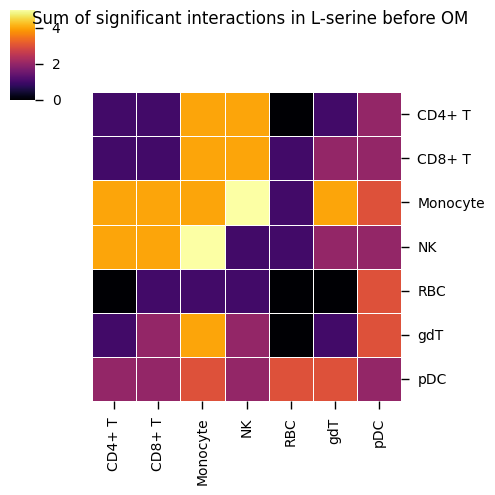

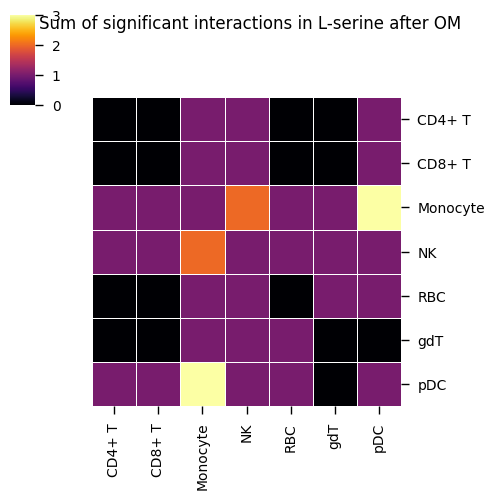

In [29]:
import ktplotspy as kpy
import matplotlib.pyplot as plt

p5aL = kpy.plot_cpdb_heatmap(pvals = cpdb_results_BO['pvalues'],
                      cell_types=["NK", "RBC", "Monocyte", "gdT","CD8+ T","CD4+ T","CD8+ T","pDC"],
                      row_cluster = False,
                      col_cluster = False,
                      degs_analysis = False,
                      figsize = (5, 5),
                      cmap = 'inferno',
                      title = "Sum of significant interactions in L-serine before OM")

p5aR = kpy.plot_cpdb_heatmap(pvals = cpdb_results_AO['pvalues'],
                      cell_types=["NK", "RBC", "Monocyte", "gdT","CD8+ T","CD4+ T","CD8+ T","pDC"],
                      row_cluster = False,
                      col_cluster = False,
                      degs_analysis = False,
                      figsize = (5, 5),
                      cmap = 'inferno',
                      title = "Sum of significant interactions in L-serine after OM")

In [30]:
p5bL = kpy.plot_cpdb(
    adata=adata_BO,
    cell_type1="CD4+ T",
    cell_type2="CD8+ T|Monocyte|NK|pDC",#|gdT|pDC|Monocyte|NK
    means = cpdb_results_BO['means'],
    pvals = cpdb_results_BO['pvalues'],
    celltype_key="cell.type.coarse",
    cmap_name = "inferno",
    # genes=["TYROBP","SEMA4D","LTBR","CD44", "PTPRC","LTB","LCK"], #
    highlight_size=1,
    figsize=(10, 8),
)

In [31]:
p5bR = kpy.plot_cpdb(
    adata=adata_AO,
    cell_type1="CD4+ T",
    cell_type2="Monocyte|NK|pDC",#|gdT|pDC|Monocyte|NK
    means = cpdb_results_AO['means'],
    pvals = cpdb_results_AO['pvalues'],
    celltype_key="cell.type.coarse",
cmap_name = "inferno",
    # genes=["TYROBP","SEMA4D","LTBR","CD44", "PTPRC","LTB","LCK"], #
    highlight_size=1,
    figsize=(10, 4),
)



In [33]:
import datetime
current_time = datetime.datetime.now().strftime("%Y-%m-%d %H-%M-%S")

file_path = f"/mnt/workingB/ASD_PBMC/results/Figure5a1_supp_{current_time}.pdf"
p5aL.savefig(file_path, dpi = 1200, bbox_inches='tight')
file_path = f"/mnt/workingB/ASD_PBMC/results/Figure5a2_supp_{current_time}.pdf"
p5aR.savefig(file_path, dpi = 1200, bbox_inches='tight')
file_path = f"/mnt/workingB/ASD_PBMC/results/Figure5b1_supp_{current_time}.pdf"
p5bL.save(file_path, dpi = 1200, bbox_inches='tight')
file_path = f"/mnt/workingB/ASD_PBMC/results/Figure5b2_supp_{current_time}.pdf"
p5bR.save(file_path, dpi = 1200, bbox_inches='tight')